Time info for start of log:
Base time stamp (server System.currentTimeMillis()):  1573697871644
Base time instant (server):  2019-11-14T02:17:51.644Z

Entries in log: 12174


,data.a0.value,data.a0.vartime,data.a1.value,data.a1.vartime,data.a3.value,data.a3.vartime,data.a4.value,data.a4.vartime,data.adc.value,data.adc.vartime,...,data.solenoid.value,data.solenoid.vartime,data.tmp.value,data.tmp.vartime,data.total.value,data.total.vartime,data.volts.value,data.volts.vartime,device,servertime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GC-SERIAL,1.573698e+12
1,90.0,429249.0,94.0,429249.0,88.0,429250.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GENERIC,1.573698e+12
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,TMP,1.573698e+12
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRESSURE-DIAPHR,1.573698e+12
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.0,429249.0,NaN,NaN,PN-JUNCTION,1.573698e+12
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4095.0,729002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,729002.0,HV_HIGHSIDE,1.573698e+12
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,51.0,NaN,NaN,NaN,NaN,NaN,NaN,SOLENOID,1.573698e+12
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.0,428996.0,VARIAC,1.573698e+12
8,95.0,429415.0,99.0,429415.0,94.0,429416.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GENERIC,1.573698e+12
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,TMP,1.573698e+12


Columns: Index(['data.a0.value', 'data.a0.vartime', 'data.a1.value', 'data.a1.vartime',
       'data.a3.value', 'data.a3.vartime', 'data.a4.value', 'data.a4.vartime',
       'data.adc.value', 'data.adc.vartime', 'data.amps.value',
       'data.amps.vartime', 'data.amps_adc.value', 'data.amps_adc.vartime',
       'data.cps.value', 'data.cps.vartime', 'data.d2.value',
       'data.d2.vartime', 'data.d2_count.value', 'data.d2_count.vartime',
       'data.d2_frequency.value', 'data.d2_frequency.vartime', 'data.d3.value',
       'data.d3.vartime', 'data.devicetime', 'data.freq.value',
       'data.freq.vartime', 'data.freq_adc.value', 'data.freq_adc.vartime',
       'data.left.value', 'data.left.vartime', 'data.lowspeed.value',
       'data.lowspeed.vartime', 'data.pot_adc.value', 'data.pot_adc.vartime',
       'data.potentiometer.value', 'data.potentiometer.vartime',
       'data.pressure.value', 'data.pressure.vartime', 'data.right.value',
       'data.right.vartime', 'data.solenoid.value

,time,A0
1,42.0,90.0
8,207.0,95.0
15,313.0,107.0
22,415.0,87.0
28,520.0,80.0
34,638.0,77.0
42,743.0,103.0
48,845.0,118.0
54,942.0,116.0
60,1049.0,110.0


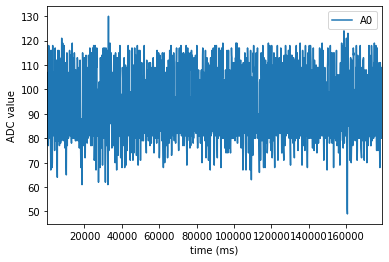

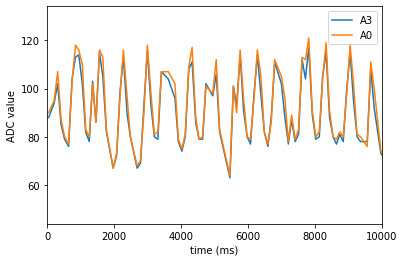

In [97]:
#
# This is generic example code to read a fusor log from python
# we need to update this if the format changes.
#

%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize    



with open('fusor-2019-11-14T02-17-51-644Z.json') as data_file: 
    data = json.load(data_file)  
    
print("Time info for start of log:")
print("Base time stamp (server System.currentTimeMillis()): ",data["base-timestamp"])
print("Base time instant (server): ",data["instant"])
print()    

df = json_normalize(data["log"], errors="ignore")
print("Entries in log:",len(df))
display(df.head(10))
print("Columns:", df.columns)
print()

#
# the devicetime is the time in millis() the device was keeping as the server was querying for data.
# servertime is the equivalent System.currenTimeMillis() for the server
# use those two to translate vartime - the time at which the device updated the value for the variable.
# also we normalize the times to the server basetime for the log
# then we can actually plot data from multiple devices across the same timeline
#

for col in df.columns:
    if col.endswith(".vartime"):
        df[col+"_server"] = df[col] - df["data.devicetime"] + df["servertime"] - data["base-timestamp"]

print("Max vartime (ms):", df.filter(like=".vartime").max().max())
        
#
# Now let's look at some individual devices and variables
# make a dataframe just for A0, with its timestamp
# we also drop all rows containing two "NaN"s or more, those are not the datapoint for this variable
#

print("Filtering out specific variables and their times:")
df_a0 = df.filter(["data.a0.vartime_server", "data.a0.value"]).dropna(thresh=2)
df_a0.columns = ["time", "A0"] # rename the columns
print("Number of data points specific to A0:",len(df_a0))
display(df_a0.head(10))

#
# pretty standard plotting
#
ax = df_a0.plot(x="time", y="A0", kind="line", legend = "A0")
ax.set_xlabel("time (ms)")
ax.set_ylabel("ADC value")
plt.show()


#
# if we want to add a variable to the display, we need to construct a second dataframe and merge it (or add it to the plot)
#

df_a3 = df.filter(["data.a3.vartime_server", "data.a3.value"]).dropna(thresh=2)
df_a3.columns = ["time", "A3"] # rename the columns

ax = df_a3.plot(x="time", y="A3", kind="line")
df_a0.plot(x="time", y="A0", kind="line",ax=ax)
ax.set_xlabel("time (ms)")
ax.set_ylabel("ADC value")
ax.set_xlim((0,10000))
plt.show()



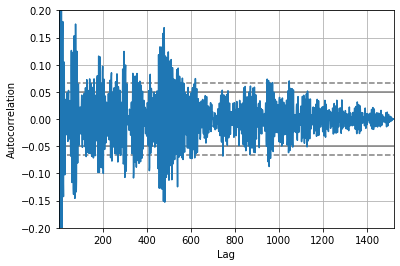

In [109]:
#
# a look at patterns with autocorrelation
# this essentially looks at how much every data point is predicted from the one n before, plots averages over n
#

from pandas.plotting import autocorrelation_plot

# Draw Plot
autocorrelation_plot(df_a0.A0.tolist())
plt.gca().set_ylim([-0.2,0.2])
plt.show()